# Diamonds

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

First, we'll load the dataset into memory. Here, we're using pandas to read a CSV file.

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploring data

We'll check for missing values and inconsistencies in the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       53930 non-null  int64  
 1   carat    53930 non-null  float64
 2   cut      53930 non-null  object 
 3   color    53930 non-null  object 
 4   clarity  53930 non-null  object 
 5   depth    50968 non-null  float64
 6   table    53930 non-null  float64
 7   price    53930 non-null  int64  
 8   x        52840 non-null  float64
 9   y        53345 non-null  float64
 10  z        53930 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.describe()

,ID,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000
mean,26964.500000,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141
std,15568.394346,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909
min,0.000000,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000
25%,13482.250000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26964.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40446.750000,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,53929.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.duplicated().sum()

0

... So far, so good 💯

We'll identify any missing values in the dataset.

In [6]:
df.isnull().sum().sort_values(ascending=False)

depth      2962
x          1090
y           585
ID            0
carat         0
cut           0
color         0
clarity       0
table         0
price         0
z             0
dtype: int64

In [7]:
df.isnull().sum()*100/len(df)

ID         0.000000
carat      0.000000
cut        0.000000
color      0.000000
clarity    0.000000
depth      5.492305
table      0.000000
price      0.000000
x          2.021139
y          1.084739
z          0.000000
dtype: float64

Upon further inspection, we've noticed that some columns have missing data.

To conduct a more in-depth analysis, we'll utilize the `.unique()` function to examine unique values in specific columns. This will help us understand the range and diversity of values within each feature.

In [8]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'Very Goo!d',
       "P*'remium", 'I#deal', '#Very Good', 'P?remium', "*'Ideal",
       '!Good', 'Pre!mium', 'Pr?emium', 'Very Go#od', 'Ide&al', 'Ide!al',
       'Id!eal', '&Premium', 'Go?od', 'G#ood', "Very *'Good", "Ide*'al",
       'V&ery Good', '&Ideal', 'Very G#ood'], dtype=object)

In [9]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', "*'E", '#F', '&G', '!H', '?J',
       '#D', '&I', '!I', '?G', '#H', '?H', '?E', "*'F", '!E', '&F', '#G',
       "*'I", '!F', '&E'], dtype=object)

In [10]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', 'S?I1',
       'SI!1', '&VS2', '&SI2', "S*'I1", 'VS?1', "S*'I2", '#VS1', 'V&S2',
       'V!S2', '!VS2', 'VS#2', "VVS*'2", "*'SI2", 'VV?S1', 'S&I1',
       "*'SI1", 'SI?1', 'VV#S1', 'V#S2', '#SI!1', 'S!I2'], dtype=object)

Upon inspecting the unique values, we can observe that there are typographical errors present in some of the columns.

## Missing data

Next, we'll further analyze the columns with missing values to decide on the best approach for handling them.

In [11]:
df['depth'].describe()

count    50968.000000
mean        61.749425
std          1.432949
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

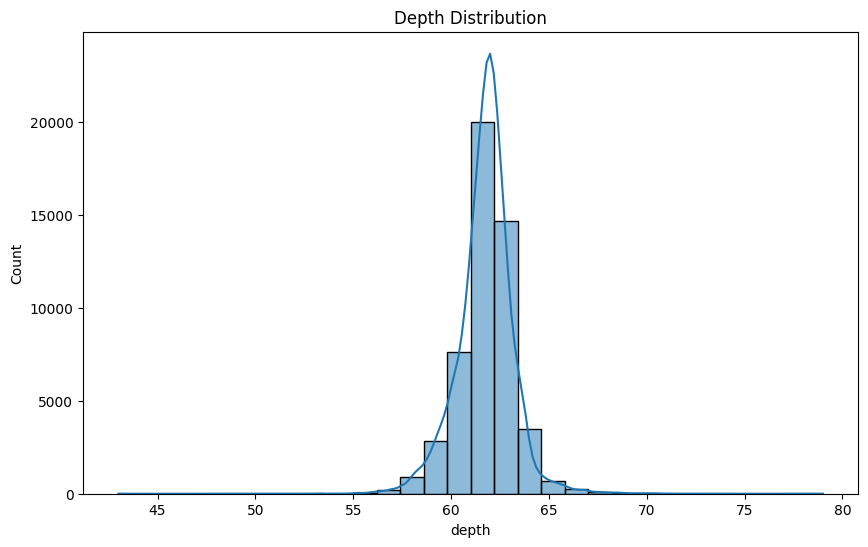

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['depth'].dropna(), bins=30, kde=True)
plt.title('Depth Distribution')
plt.show()


I decided to use the median to fill in the missing values in 'depth' because it's a robust central measure unaffected by outliers.

In [13]:
df['depth'].fillna(df['depth'].median(), inplace=True)

In [14]:
df['depth'].describe()

count    53930.000000
mean        61.752203
std          1.393089
min         43.000000
25%         61.100000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

We analyzed the information from column X

In [15]:
df['x'].describe()

count    52840.000000
mean         5.730617
std          1.127572
min         -6.370000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

I noticed there are negative numbers in the column. In total, there are 5 negative numbers. I have a few theories about what this might signify, as I suspect they could be the dimensions of diamonds. However, I believe I need to gain a better understanding of the meaning of columns X, Y and Z, where there are also 5 negative numbers. Therefore, I'll leave those negative numbers unchanged for now.

In [16]:
x_negatives = (df['x'] < 0).sum()
x_negatives

5

In [17]:
y_negatives = (df['y'] < 0).sum()
y_negatives

5

In [18]:
y_negatives = (df['z'] < 0).sum()
y_negatives

5

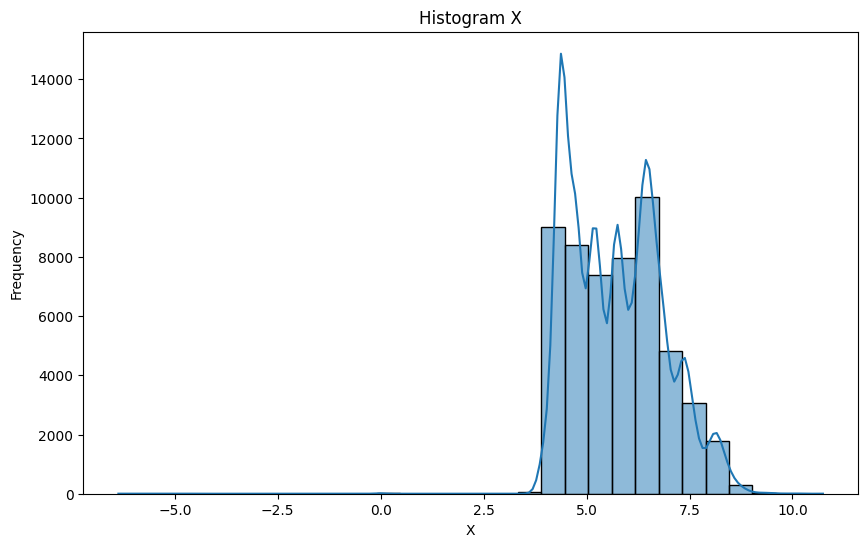

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['x'], bins=30, kde=True)
plt.title('Histogram X')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

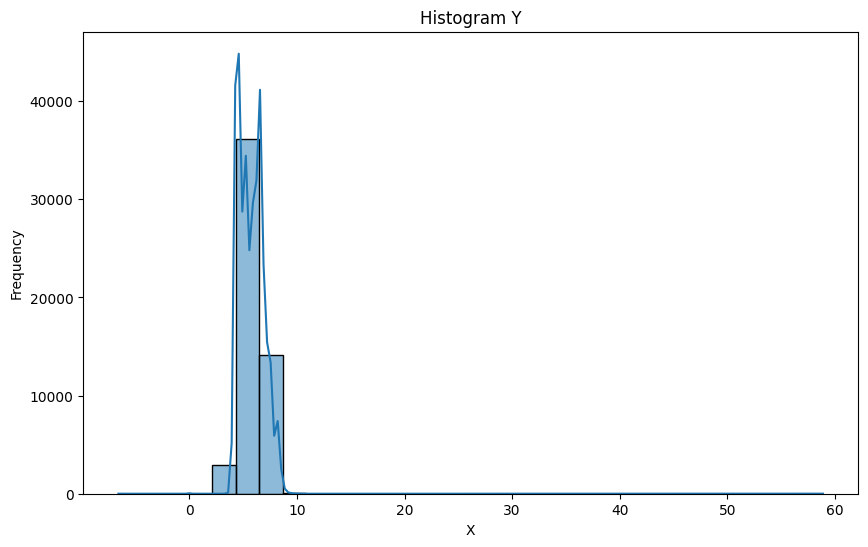

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['y'], bins=30, kde=True)
plt.title('Histogram Y')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

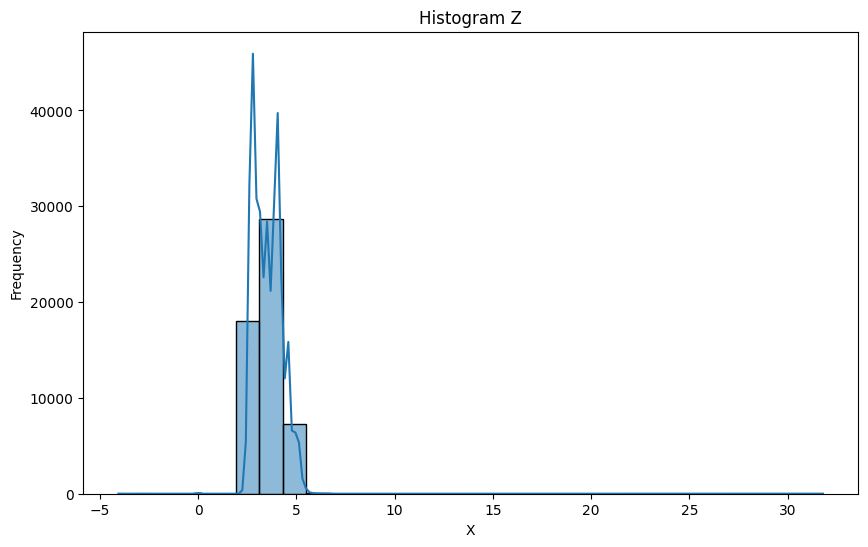

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['z'], bins=30, kde=True)
plt.title('Histogram Z')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

In this case I decided to use the median to fill in the missing values in X and Y because it's a robust central measure unaffected by outliers.

In [22]:
df['x'].fillna(df['x'].median(), inplace=True)

In [23]:
df['y'].fillna(df['y'].median(), inplace=True)

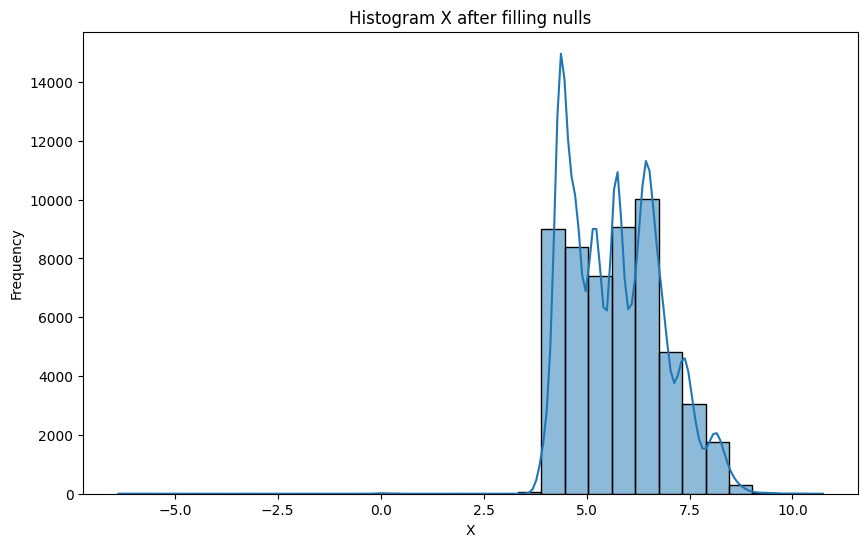

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['x'], bins=30, kde=True)
plt.title('Histogram X after filling nulls')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

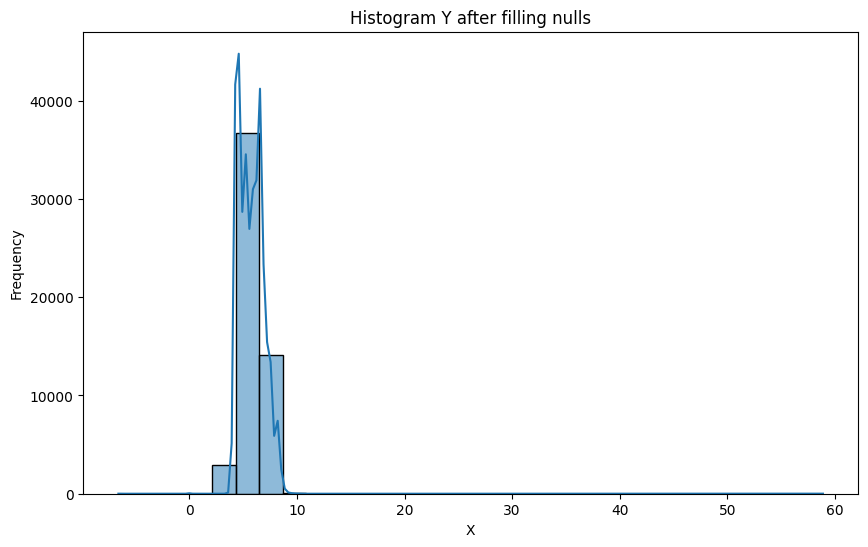

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['y'], bins=30, kde=True)
plt.title('Histogram Y after filling nulls')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

Now we don't have null values

In [26]:
df.isnull().sum().sort_values(ascending=False)

ID         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Cleaning errors

In [27]:
# Cleaning special characters
corrections = {
    "Very Goo!d": "Very Good",
    "P*'remium": "Premium",
    "I#deal": "Ideal",
    "#Very Good": "Very Good",
    "P?remium": "Premium",
    "*'Ideal": "Ideal",
    "!Good": "Good",
    "Pre!mium": "Premium",
    "Pr?emium": "Premium",
    "Very Go#od": "Very Good",
    "Ide&al": "Ideal",
    "Ide!al": "Ideal",
    "Id!eal": "Ideal",
    "&Premium": "Premium",
    "Go?od": "Good",
    "G#ood": "Good",
    "Very *'Good": "Very Good",
    "Ide*'al": "Ideal",
    "V&ery Good": "Very Good",
    "&Ideal": "Ideal",
    "Very G#ood": "Very Good"
}

# Applying in the column
df['cut'] = df['cut'].replace(corrections)

In [28]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [29]:
corrections = {
    "*'E": "E",
    "#F": "F",
    "&G": "G",
    "!H": "H",
    "?J": "J",
    "#D": "D",
    "&I": "I",
    "!I": "I",
    "?G": "G",
    "#H": "H",
    "?H": "H",
    "?E": "E",
    "*'F": "F",
    "!E": "E",
    "&F": "F",
    "#G": "G",
    "*'I": "I",
    "!F": "F",
    "&E": "E"
}

df['color'] = df['color'].replace(corrections)

In [30]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [31]:
corrections = {
    "S?I1": "SI1",
    "SI!1": "SI1",
    "&VS2": "VS2",
    "&SI2": "SI2",
    "S*'I1": "SI1",
    "VS?1": "VS1",
    "S*'I2": "SI2",
    "#VS1": "VS1",
    "V&S2": "VS2",
    "V!S2": "VS2",
    "!VS2": "VS2",
    "VS#2": "VS2",
    "VVS*'2": "VVS2",
    "*'SI2": "SI2",
    "VV?S1": "VVS1",
    "S&I1": "SI1",
    "*'SI1": "SI1",
    "SI?1": "SI1",
    "VV#S1": "VVS1",
    "V#S2": "VS2",
    "#SI!1": "SI1",
    "S!I2": "SI2"
}

df['clarity'] = df['clarity'].replace(corrections)

In [32]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Also, we'll remove the first column containing the diamond IDs as it doesn't contribute to the prediction.

In [33]:
df.drop('ID', axis=1, inplace=True)

Now, data is clean for the next step!! 💯

## Preprocessing workflow

I'm going to use an ordinal encoder for the categorical columns since the data indicates a hierarchy in the field of diamonds.

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
#Defining cut categories
cut_category = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Encoding
encoder = OrdinalEncoder(categories=[cut_category])

#Transforming column
df['cut_encoded'] = encoder.fit_transform(df[['cut']])

# Drop original 'cut'
df.drop(columns=['cut'], inplace=True)

In [36]:
df.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_encoded
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3.0
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3.0


In [37]:
#Doing the same with category color
color_category = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

encoder = OrdinalEncoder(categories=[color_category])

df['color_encoded'] = encoder.fit_transform(df[['color']])

df.drop(columns=['color'], inplace=True)

In [38]:
df.head()

,carat,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded
0,0.23,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0
1,0.21,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0,1.0
2,0.23,VS1,56.9,65.0,327,4.05,4.07,2.31,3.0,1.0
3,0.29,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0,5.0
4,0.31,SI2,63.3,58.0,335,4.34,4.35,2.75,3.0,6.0


In [39]:
#Now with clarity
clarity_categories = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

encoder = OrdinalEncoder(categories=[clarity_categories])

df['clarity_encoded'] = encoder.fit_transform(df[['clarity']])

df.drop(columns=['clarity'], inplace=True)

In [40]:
df.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,6.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1.0,1.0,5.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,3.0,1.0,3.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1.0,5.0,4.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,3.0,6.0,6.0


Now we need to decide how to preprocessing the numerical data

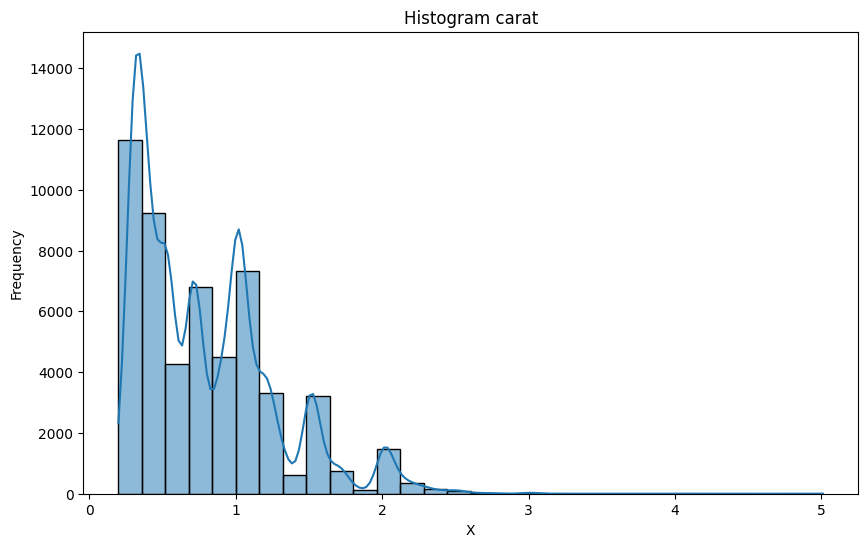

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['carat'], bins=30, kde=True)
plt.title('Histogram carat')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

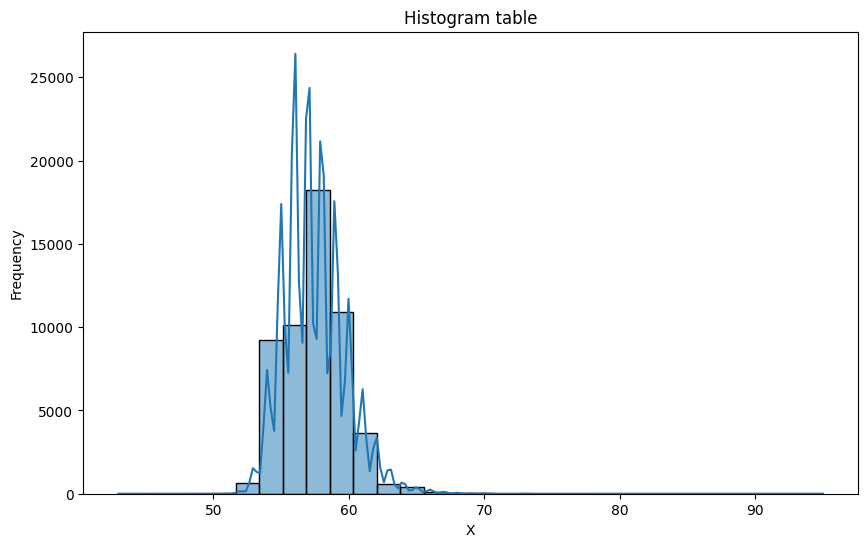

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['table'], bins=30, kde=True)
plt.title('Histogram table')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

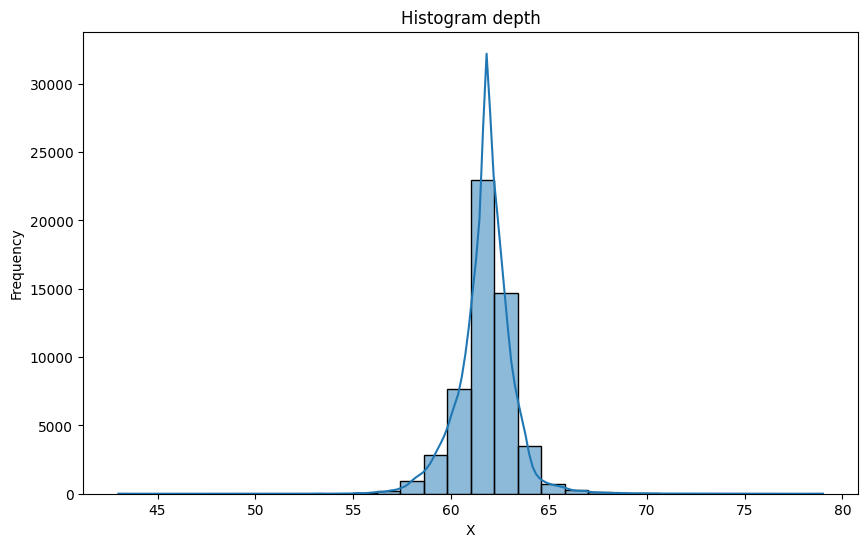

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['depth'], bins=30, kde=True)
plt.title('Histogram depth')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

I've decided to use RobustScaler due to the distribution of the data and the presence of outliers.

In [44]:
from sklearn.preprocessing import RobustScaler

In [45]:
scaler = RobustScaler()

#Selecting columns
ordinal_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

df[ordinal_features] = scaler.fit_transform(df[ordinal_features])

In [46]:
df.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,-0.734375,-0.214286,-0.666667,326,-0.972222,-0.961111,-0.973451,0.0,1.0,6.0
1,-0.765625,-1.428571,1.333333,326,-1.005556,-1.038889,-1.079646,1.0,1.0,5.0
2,-0.734375,-3.500000,2.666667,327,-0.916667,-0.911111,-1.079646,3.0,1.0,3.0
3,-0.640625,0.428571,0.333333,334,-0.833333,-0.822222,-0.796460,1.0,5.0,4.0
4,-0.609375,1.071429,0.333333,335,-0.755556,-0.755556,-0.690265,3.0,6.0,6.0


In [47]:
df.describe()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.153087,-0.034141,0.152443,3933.054942,0.016666,0.012701,0.007204,1.095939,2.594103,3.949119
std,0.740679,0.995064,0.744859,3989.628569,0.620071,0.630921,0.627353,1.116593,1.701080,1.647181
min,-0.781250,-13.428571,-4.666667,326.000000,-6.705556,-6.844444,-6.716814,0.000000,0.000000,0.000000
25%,-0.468750,-0.500000,-0.333333,950.000000,-0.538889,-0.544444,-0.548673,0.000000,1.000000,3.000000
50%,0.000000,0.000000,0.000000,2401.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000
75%,0.531250,0.500000,0.666667,5325.000000,0.461111,0.455556,0.451327,2.000000,4.000000,5.000000
max,6.734375,12.285714,12.666667,18823.000000,2.800000,29.550000,25.017699,4.000000,6.000000,7.000000


Preprocessing finished!! 💯

## Selecting features

First, let's investigate about correlation

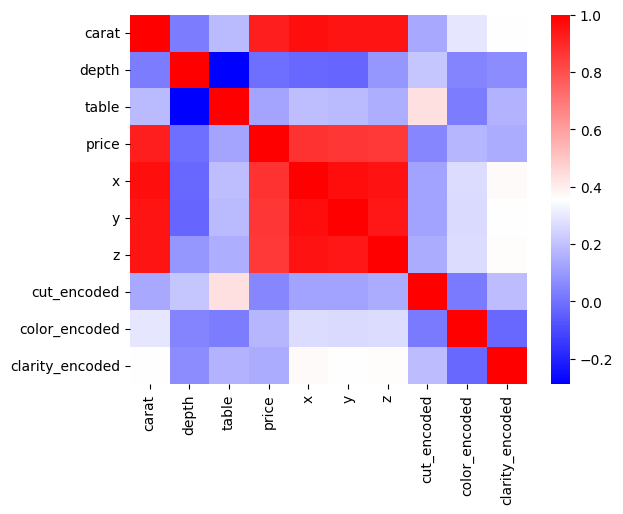

In [48]:
correlation_matrix = df.corr()

column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [49]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Filter the DataFrame to include only the combinations containing the 'price' feature
price_correlations = corr_df[(corr_df['feature_1'] == 'price') | (corr_df['feature_2'] == 'price')]

# Sort the DataFrame by the absolute correlation value in descending order
price_correlations_sorted = price_correlations.reindex(price_correlations['correlation'].abs().sort_values(ascending=False).index)

# Display the combinations of features related to 'price' sorted by correlation
price_correlations_sorted

,feature_1,feature_2,correlation
3,carat,price,0.921590
30,price,carat,0.921590
34,price,x,0.872049
43,x,price,0.872049
53,y,price,0.861743
35,price,y,0.861743
63,z,price,0.857288
36,price,z,0.857288
83,color_encoded,price,0.172574
38,price,color_encoded,0.172574


In consideration of our client's interest in determining the price of lost diamonds, we examined the relationship with this variable. We observed that the variables most strongly correlated are carat, x, y and z.

Therefore, we will build the model based on this analysis.

## Base modeling

In [50]:
X = df.drop(columns=['price'])
y = df['price']

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [52]:
model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5)

base_model_score = cv_results['test_score'].mean()
base_model_score

-3.442396171493109

We see that the results are terrible.

## Modelling with selecting features

We're going to use the most correlated variables

In [53]:
X_selected = X[['carat', 'x', 'y', 'z']]
y = df['price']

model = LinearRegression()

cv_results = cross_validate(model, X_selected, y, cv=10)

simplified_model_score = cv_results['test_score'].mean()

simplified_model_score

-1.7895715590164811

Still very bad

## Train / Test split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Baseline KNN model

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

In [57]:
knn = KNeighborsRegressor(n_neighbors=1)
cv_results = cross_validate(knn, X_train, y_train, cv=5)
cv_results

{'fit_time': array([0.03756499, 0.0233674 , 0.02464986, 0.02468443, 0.02823067]),
 'score_time': array([0.13906598, 0.09609485, 0.10001945, 0.10767817, 0.09576416]),
 'test_score': array([0.93766258, 0.9361046 , 0.9335742 , 0.94049265, 0.93693314])}

Let's try only with the most correlated variables

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

In [59]:
knn = KNeighborsRegressor(n_neighbors=1)
cv_results = cross_validate(knn, X_train, y_train, cv=5)
cv_results

{'fit_time': array([0.01672935, 0.01350808, 0.01390433, 0.01391506, 0.01670122]),
 'score_time': array([0.01921582, 0.01875448, 0.01956367, 0.01742363, 0.01874328]),
 'test_score': array([0.78164093, 0.78075018, 0.77324788, 0.77819251, 0.78081169])}

The first model with all the variables is better, we will continue with all variables.

## Gridsearch

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
k_grid = {'n_neighbors':[1, 5, 10, 20, 50]}

# Instantiate Grid Search
grid = GridSearchCV(model, k_grid, cv=5, n_jobs=-1)

# Fit data to Grid Search
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]})

According to the GridSearch, what is the optimal K value?

In [62]:
grid.best_params_

{'n_neighbors': 10}

What is the best score the optimal K value produced?

In [63]:
grid.best_score_

0.9544107793169754

## Final decision

Comparing the four models, the K-Nearest Neighbors model with all variables and 10 neighbors is clearly superior due to its higher score. This model provides better predictive capability and explains a larger proportion of the variability in diamond prices.